# Rosenbrock banana

Here, we perform optimization for the Rosenbrock banana function, which does not require an AMICI model. In particular, we try several ways of specifying derivative information.

In [1]:
import pypesto
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

/home/yannik/yenv2/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/yannik/yenv2/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Define the objective and problem

In [2]:
# first type of objective
objective1 = pypesto.Objective(fun=sp.optimize.rosen, 
                             grad=sp.optimize.rosen_der, 
                             hess=sp.optimize.rosen_hess)

# second type of objective
def rosen2(x):
    return sp.optimize.rosen(x), sp.optimize.rosen_der(x), sp.optimize.rosen_hess(x)
objective2 = pypesto.Objective(fun=rosen2, grad=True, hess=True)

lb = -2 * np.ones((100,1))
ub = 2 * np.ones((100,1))

problem1 = pypesto.Problem(objective=objective1, lb=lb, ub=ub)
problem2 = pypesto.Problem(objective=objective2, lb=lb, ub=ub)

## Illustration

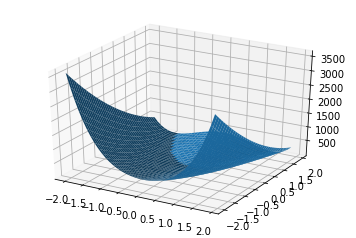

In [3]:
x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)
x, y = np.meshgrid(x, y)
z = np.zeros_like(x)
for j in range(0, x.shape[0]):
    for k in range(0, x.shape[1]):
        z[j,k] = objective1([x[j,k], y[j,k]], (0,))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X=x, Y=y, Z=z)        

## Run optimization

In [4]:
optimizer = pypesto.ScipyOptimizer()
                                                                                                                                                                                                                                                                                                                                                                
result1 = pypesto.minimize(problem=problem1, optimizer=optimizer, n_starts=20)
result2 = pypesto.minimize(problem=problem2, optimizer=optimizer, n_starts=20)

/home/yannik/yenv2/lib/python3.6/site-packages/scipy/optimize/_minimize.py:507: RuntimeWarning: Method L-BFGS-B does not use Hessian information (hess).
  RuntimeWarning)
/home/yannik/yenv2/lib/python3.6/site-packages/scipy/optimize/_minimize.py:513: RuntimeWarning: Method L-BFGS-B does not use Hessian-vector product information (hessp).
  'information (hessp).' % method, RuntimeWarning)


## Evaluate results

In [5]:
result1.optimize_result.as_dataframe(['fval', 'n_fval', 'time'])

fval  n_fval      time
0   6.101281e-11     607  0.086393
1   8.610113e-11     587  0.087911
2   9.789308e-11     595  0.244236
3   1.185401e-10     616  0.212851
4   1.779097e-10     599  0.132269
5   1.815622e-10     612  0.246848
6   2.072207e-10     595  0.097515
7   2.261735e-10     598  0.121689
8   2.327169e-10     605  0.257655
9   2.581491e-10     616  0.097119
10  2.786271e-10     588  0.084151
11  2.838549e-10     614  0.181077
12  2.892986e-10     581  0.097925
13  3.822547e-10     591  0.100964
14  5.652946e-10     601  0.088182
15  5.701102e-10     588  0.111156
16  7.577993e-10     615  0.258811
17  1.417342e-09     615  0.091805
18  3.986624e+00     612  0.095424
19  3.986624e+00     605  0.126817

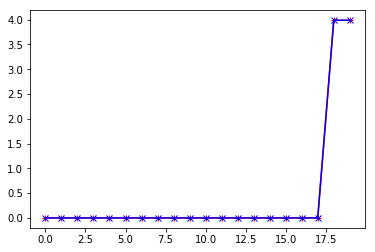

In [6]:
import matplotlib.pyplot as plt

plt.plot(result1.optimize_result.get_for_key('fval'), '-r+', result2.optimize_result.get_for_key('fval'), '-bx')